

#Task 2 - Mask or No Mask Classification

In [ ]:
#Install important libraries\
# train and predict the model
# Augmentation

In [ ]:
!pip install ultralytics -q #-q to avoid extra unnecessary output

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 10.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 237MB/s]


#Train The Model

In [ ]:
model.train(data = "/content/drive/MyDrive/archive (1)/face_mask_detection_yolov5/dataset.yaml", epochs = 1)

In [ ]:
infer = YOLO("/content/runs/detect/train/weights/best.pt")

#Predict The Model

In [ ]:
infer.predict("/content/drive/MyDrive/archive (1)/test", save = True, save_txt = True)


image 1/15 /content/drive/MyDrive/archive (1)/test/173.jpg: 640x640 17 masks, 37.6ms
image 2/15 /content/drive/MyDrive/archive (1)/test/27.jpg: 640x640 16 masks, 37.3ms
image 3/15 /content/drive/MyDrive/archive (1)/test/crowd_mask181.jpg: 384x640 23 masks, 71.5ms
image 4/15 /content/drive/MyDrive/archive (1)/test/crowd_mask23.jpg: 352x640 4 masks, 78.4ms
image 5/15 /content/drive/MyDrive/archive (1)/test/crowd_mask38.jpg: 416x640 12 masks, 70.5ms
image 6/15 /content/drive/MyDrive/archive (1)/test/crowd_mask62.jpg: 480x640 8 masks, 1 nomask, 74.0ms
image 7/15 /content/drive/MyDrive/archive (1)/test/crowd_mask65.jpg: 384x640 5 masks, 27.1ms
image 8/15 /content/drive/MyDrive/archive (1)/test/image_117.jpg: 416x640 4 masks, 28.9ms
image 9/15 /content/drive/MyDrive/archive (1)/test/image_5.jpg: 480x640 8 masks, 29.4ms
image 10/15 /content/drive/MyDrive/archive (1)/test/image_503.jpg: 448x640 4 masks, 70.3ms
image 11/15 /content/drive/MyDrive/archive (1)/test/image_577.jpeg: 640x448 14 mask

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'mask', 1: 'nomask'}
 orig_img: array([[[ 62,  65,  40],
         [ 62,  65,  40],
         [ 62,  65,  40],
         ...,
         [171, 171, 153],
         [175, 175, 157],
         [177, 177, 159]],
 
        [[ 62,  65,  40],
         [ 62,  65,  40],
         [ 62,  65,  40],
         ...,
         [172, 172, 154],
         [175, 175, 157],
         [177, 177, 159]],
 
        [[ 63,  66,  41],
         [ 62,  65,  40],
         [ 62,  65,  40],
         ...,
         [174, 174, 158],
         [175, 175, 159],
         [176, 176, 160]],
 
        ...,
 
        [[ 58,  88,  83],
         [ 55,  82,  78],
         [ 49,  72,  68],
         ...,
         [ 53,  83,  78],
         [ 55,  85,  80],
         [ 57,  87,  82]],
 
        [[ 51,  81,  76],
         [ 50,  77,  73],
         [ 47,  70,  66],
         ...,
         [ 50,  80

#Augmentation

In [ ]:
import glob
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import albumentations as Aug

# Define augmentations
trans = Aug.Compose([
    Aug.HorizontalFlip(p=0.4),
    Aug.RandomBrightnessContrast(p=0.3),
    Aug.Rotate(limit=35),
    Aug.HueSaturationValue(hue_shift_limit=25, sat_shift_limit=25, val_shift_limit=60, p=0.4)
])




In [ ]:
import numpy as np
img_ann = trans(image=np.array(Image.open('/content/drive/MyDrive/archive (1)/face_mask_detection_yolov5/face_data/train/images/image_1.jpg')))['image']

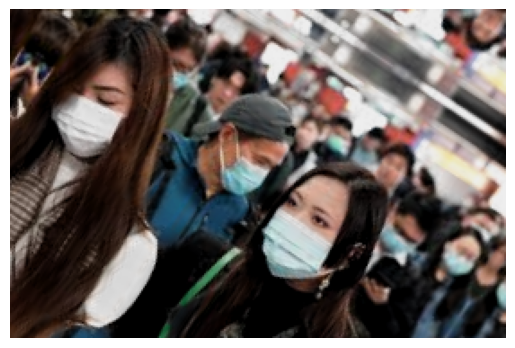

In [ ]:
plt.imshow(img_ann)
plt.axis('off')
plt.show()